# Task # 2 - To Explore Supervised Machine Learning
In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

Data can be found at http://bit.ly/w-data


# Problem Statement
What will be predicted score if a student study for 9.25 hrs in a day?

In [1]:
#Load Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



#import sklearn train_test_split library
from sklearn.model_selection import train_test_split


# Machine Learning Algorithm
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.formula.api import ols


#importing important error metrics libraries
from sklearn import metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import r2_score

In [2]:
#Load The Data

data = pd.read_csv('http://bit.ly/w-data')

In [3]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


# Descriptive Statistics

In [4]:
data.describe().style.background_gradient(cmap = 'copper')

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


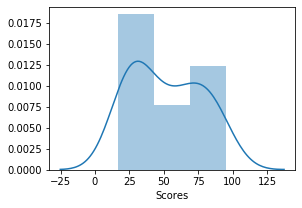

In [5]:
# Check the Distribution of the Target Column ( Scores)

plt.rcParams['figure.figsize'] = (15,3)

plt.subplot(1, 3, 1)
sns.distplot(data['Scores'],)

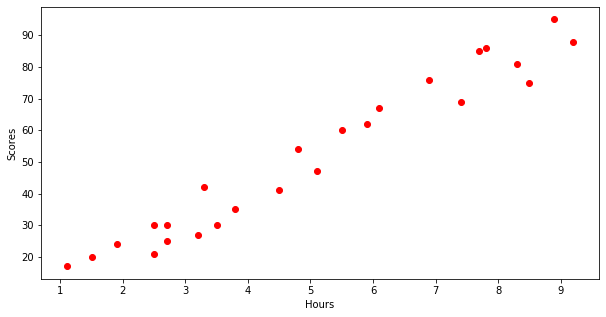

In [6]:
# Check the Relation of Hours with respect to Scores
plt.figure(figsize=(10,5))
plt.scatter(data['Hours'], data['Scores'], color= "r");
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

# Missing Value Analysis

In [7]:
#Missing Value Analysis in Train data
missing_val=pd.DataFrame(data.isnull().sum())
#Reset index
missing_val = missing_val.reset_index()
missing_val

,index,0
0,Hours,0
1,Scores,0


# Declare the dependent and the independent variables

In [8]:
X = data.iloc[ :, :-1].values
Y = data.iloc[ :, 1].values

# Splitting data into train and test

In [9]:
#train_test_split

X_train , X_test , Y_train , Y_test = train_test_split( X , Y , test_size = 0.2 ,random_state = 0)

# Building the model on train sets

In [10]:
# Linear Regression Model

model = LinearRegression()

model.fit(X_train, Y_train)

LinearRegression()

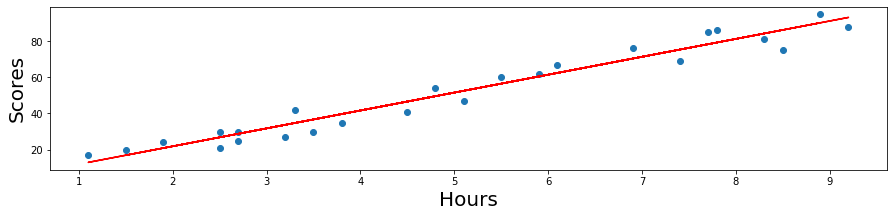

In [11]:
#Formula : (y = bx + constant)
line = model.coef_*X + model.intercept_  

#Plot for test data
plt.scatter(X, Y)
plt.plot(X, line , color= "r");
plt.xlabel('Hours', fontsize = 20)
plt.ylabel('Scores', fontsize = 20)
plt.show()

# Predict the result of test Data

In [12]:
y_pred = model.predict(X_test)
y_pred

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

# Create a dataframe with Actual Values  and Predicted values

In [13]:
df = pd.DataFrame({ "Actual" : Y_test,"Predicted" : y_pred})

In [14]:
df.head()

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


# Model Evaluation with Error Matrix

In [15]:
from sklearn.metrics import mean_squared_error
from sklearn import metrics

def Mape(y_true, y_pred):
    mape = np.mean(np.abs((y_true-y_pred)/y_pred)*100)
    return mape

In [16]:
#calculate Mape with Accuracy

Mape = Mape(Y_test, y_pred)

Accuracy  = 100-Mape

In [17]:
#Print Result

print('Mean Absolute Percentage Error:',  Mape)

print('Mean Absolute Error:',  metrics.mean_absolute_error(Y_test, y_pred))

print('Mean Squared Error:',  metrics.mean_squared_error(Y_test, y_pred)) 

print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test , y_pred)))

print('Model Accuracy:',  Accuracy)

Mean Absolute Percentage Error: 12.26093404014752
Mean Absolute Error: 4.183859899002975
Mean Squared Error: 21.5987693072174
Root Mean Squared Error: 4.6474476121003665
Model Accuracy: 87.73906595985248


# Test with our own data

In [18]:
hours = np.array([9.25])

hours = hours.reshape(-1 , 1)

pred_score = model.predict(hours)

print("No of Hours = {}".format(hours))

print("Predicted Score = {}".format(pred_score[0]))

No of Hours = [[9.25]]
Predicted Score = 93.69173248737538


# Thank You

Raman Kumar